In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

In [53]:
idx = 955 # inside core

#idx = 612 # sheared region

#path='./voro_p_divgrad_div/'

#%cd ../voro_p_divgrad_div
#%cd ../dela_p_ppe_spring
#%cd ../dela_p_ppe3
#%cd ../dG_art2

%cd ../GM_art2

#T_spring = 20 * 0.005
#omega = 2 * np.pi / T_spring

#list_time = glob.glob(path+'[0-9]*')

#  sort
def by_number(elem):
    return float(elem)

times = sorted(glob.glob('[0-9]*'), key=by_number)


/home/daniel/WaaG/GM_art2


In [54]:
N=len(times)

ttime = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
p = np.zeros(N)

tt = 0
for time in times:

    dt=np.loadtxt(time+'/particles.dat')

    xx = dt[:,0]
    yy = dt[:,1]

#    w=dt[:,4];
    #    vx=dt[:,5]; vym=dt[:,6];
    #  s=dt[:,10]
    #  I=dt[:,11];

    pp =dt[:,9]
    # Gallouet & Merrigot only
    #p = 0.5*omega**2 * w

    r = np.sqrt( xx**2 + yy**2 )

    #make furthest pressure value 0

    rm = np.argmax(r)

    pp -= pp[ rm ] #  np.min( p )

    ttime[tt] = float( time )
    x[tt] = xx[idx]
    y[tt] = yy[idx]
    p[tt] = pp[idx]
    tt += 1



In [55]:
times[-1]

'3.77'

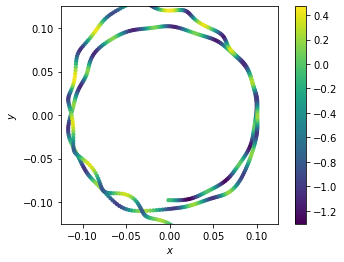

In [56]:
LL= 1

p[0] = p[1] # initial pressure = 0 spoils the color range

plt.axis('scaled')

plt.scatter( x , y , 10, c=p )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim([-LL/8.0 , LL/8.0 ])
plt.ylim([-LL/8.0 , LL/8.0 ])
#plt.clim(-1,1)
plt.colorbar()
plt.savefig( 'traj'+str( idx )+'.png', dpi=300 )


(-1.0, 1.0)

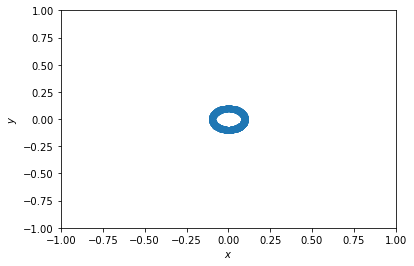

In [37]:
LL= 8

plt.plot( x , y , 'o' )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim([-LL/8.0 , LL/8.0 ])
plt.ylim([-LL/8.0 , LL/8.0 ])

